In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

data_farm = pd.read_csv('/content/drive/MyDrive/jala_performance_farm.csv')

In [ ]:
data_farm

,farms_id,ponds_id,cycles_id,province,regency,timezone,length,width,deep,total_seed,...,avg_hardness,avg_calcium,avg_magnesium,avg_carbonate,avg_bicarbonate,avg_tom,avg_total_plankton,ADG,SR,FCR
0,8393,39725,15434,JAWA BARAT,CIREBON,+07:00,38.0,18.00,1.0,75000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.173804,25.200000,5.520667
1,10239,38470,15067,JAWA TIMUR,JEMBER,+07:00,33.0,33.00,1.0,100000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.067857,60.550000,2.710405
2,10255,32505,15773,JAWA TIMUR,JEMBER,+07:00,25.0,30.00,1.5,75000,...,4620.0,740.0,3880.0,NaN,138.000000,58.048000,3.391667e+05,0.190000,10.218667,7.623278
3,9789,19637,20664,KEPULAUAN BANGKA BELITUNG,BANGKA,+07:00,20.0,15.00,1.3,150000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.130000,4.513227,21.555960
4,6081,36293,16052,JAWA TENGAH,CILACAP,+07:00,65.0,62.00,1.0,340200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.217798,54.801235,1.978974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,8318,23703,10711,JAWA TENGAH,CILACAP,+07:00,38.3,28.72,NaN,115600,...,2647.0,529.5,2117.5,4.50,134.000000,59.500000,1.347500e+05,0.123413,13.951557,2.484524
107,3,33291,19808,JAWA TENGAH,PURWOREJO,+07:00,30.0,25.00,1.0,125000,...,6902.0,1229.0,5673.0,32.32,116.486667,70.783333,1.325000e+06,0.118571,85.961360,1.196130
108,8304,32730,20076,JAWA TENGAH,CILACAP,+07:00,64.0,14.00,1.5,20000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025000,29.500000,0.584000
109,8375,38592,16008,NaN,NaN,+07:00,30.0,18.00,1.0,100000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.173730,75.600000,1.516825


In [ ]:
data_farm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   farms_id                 111 non-null    int64  
 1   ponds_id                 111 non-null    int64  
 2   cycles_id                111 non-null    int64  
 3   province                 97 non-null     object 
 4   regency                  95 non-null     object 
 5   timezone                 111 non-null    object 
 6   length                   111 non-null    float64
 7   width                    111 non-null    float64
 8   deep                     108 non-null    float64
 9   total_seed               111 non-null    int64  
 10  started_at               111 non-null    object 
 11  finished_at              111 non-null    object 
 12  area                     111 non-null    float64
 13  padat_tebar              111 non-null    float64
 14  cycle_day_count          1

In [ ]:
def classify_budidaya(padat_tebar):
    if padat_tebar <= 5:
        return 'Sederhana'
    elif 5 < padat_tebar <= 15:
        return 'Semi Intensif'
    elif 15 < padat_tebar <= 50:
        return 'Intensif'
    else:
        return 'Super Intensif'

data_farm['jenis_budidaya'] = data_farm['padat_tebar'].apply(classify_budidaya)

print(data_farm[['padat_tebar', 'jenis_budidaya']])

     padat_tebar  jenis_budidaya
0     109.649123  Super Intensif
1     142.857143  Super Intensif
2      50.000000        Intensif
3     500.000000  Super Intensif
4      84.416873  Super Intensif
..           ...             ...
106   105.090909  Super Intensif
107   166.666667  Super Intensif
108    22.321429        Intensif
109   185.185185  Super Intensif
110    33.333333        Intensif

[111 rows x 2 columns]


In [ ]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    optimal_interval = {'lower_bound': lower_bound, 'upper_bound': upper_bound}
    return outliers, optimal_interval

outliers_adg_farm, optimal_adg_interval = detect_outliers_iqr(data_farm, 'ADG')
outliers_sr_farm, optimal_sr_interval = detect_outliers_iqr(data_farm, 'SR')
outliers_fcr_farm, optimal_fcr_interval = detect_outliers_iqr(data_farm, 'FCR')

outliers_counts_farm = {
    'ADG': outliers_adg_farm.shape[0],
    'SR': outliers_sr_farm.shape[0],
    'FCR': outliers_fcr_farm.shape[0]
}

print(outliers_counts_farm)
print("----------------------------------------------------------------------------------")
print(outliers_adg_farm[['ADG']].describe())
print(outliers_sr_farm[['SR']].describe())
print(outliers_fcr_farm[['FCR']].describe())
print("----------------------------------------------------------------------------------")
print("Optimal ADG :",optimal_adg_interval)
print("Optimal SR  :",optimal_sr_interval)
print("Optimal FCR :",optimal_fcr_interval)

{'ADG': 4, 'SR': 5, 'FCR': 9}
----------------------------------------------------------------------------------
            ADG
count  4.000000
mean   0.589630
std    0.478714
min   -0.072768
25%    0.482701
50%    0.679929
75%    0.786858
max    1.071429
              SR
count   5.000000
mean   81.534330
std     6.147547
min    75.600000
25%    76.370291
50%    80.000000
75%    85.961360
max    89.740000
             FCR
count   9.000000
mean   19.217391
std     8.457084
min    10.581451
25%    14.204167
50%    15.532405
75%    21.555960
max    36.449835
----------------------------------------------------------------------------------
Optimal ADG : {'lower_bound': -0.061113945578231216, 'upper_bound': 0.6237613378684804}
Optimal SR  : {'lower_bound': -23.497262798604353, 'upper_bound': 73.61314715523886}
Optimal FCR : {'lower_bound': -2.152036569956109, 'upper_bound': 9.635250521404378}


In [ ]:
print("\nADG Outliers Values:")
print(outliers_adg_farm[['farms_id','ADG']].sort_values(by='ADG'))

print("\nSR Outliers Values:")
print(outliers_sr_farm[['farms_id','SR']].sort_values(by='SR'))

print("\nFCR Outliers Values:")
print(outliers_fcr_farm[['farms_id','FCR']].sort_values(by='FCR'))


ADG Outliers Values:
    farms_id       ADG
20      8332 -0.072768
97      8529  0.667857
78      9225  0.692001
33     10288  1.071429

SR Outliers Values:
     farms_id         SR
109      8375  75.600000
29       8408  76.370291
96      10158  80.000000
107         3  85.961360
21       8409  89.740000

FCR Outliers Values:
     farms_id        FCR
93       3550  10.581451
87      10256  14.085714
78       9225  14.204167
30       3593  14.932576
105      8306  15.532405
54       8790  16.250000
3        9789  21.555960
20       8332  29.364407
11       8470  36.449835


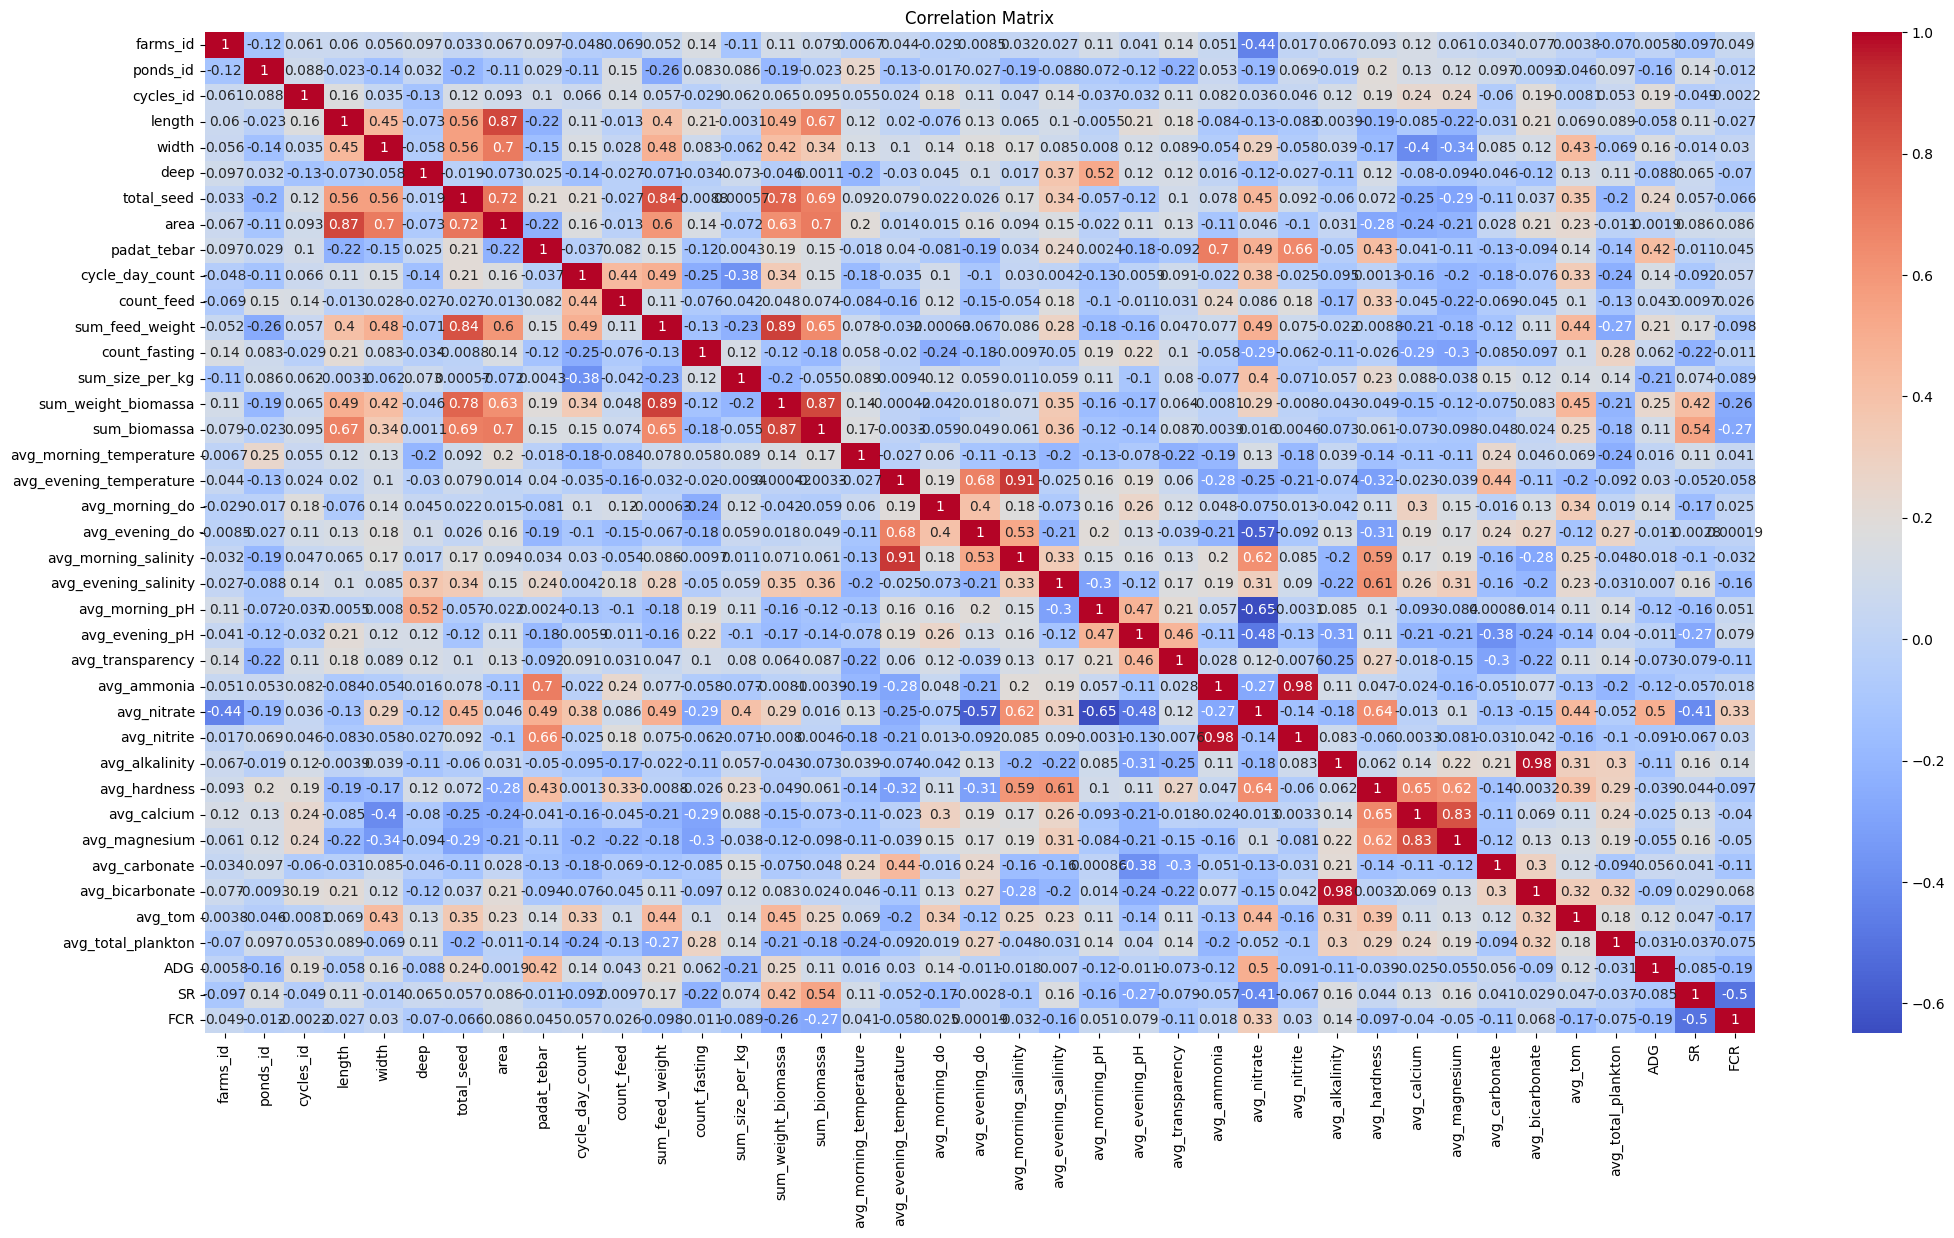

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

numeric_columns = data_farm.select_dtypes(include=[np.number]).columns
numeric_data = data_farm[numeric_columns]

correlation_matrix = numeric_data.corr()
plt.figure(figsize=(25, 13), dpi=100)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

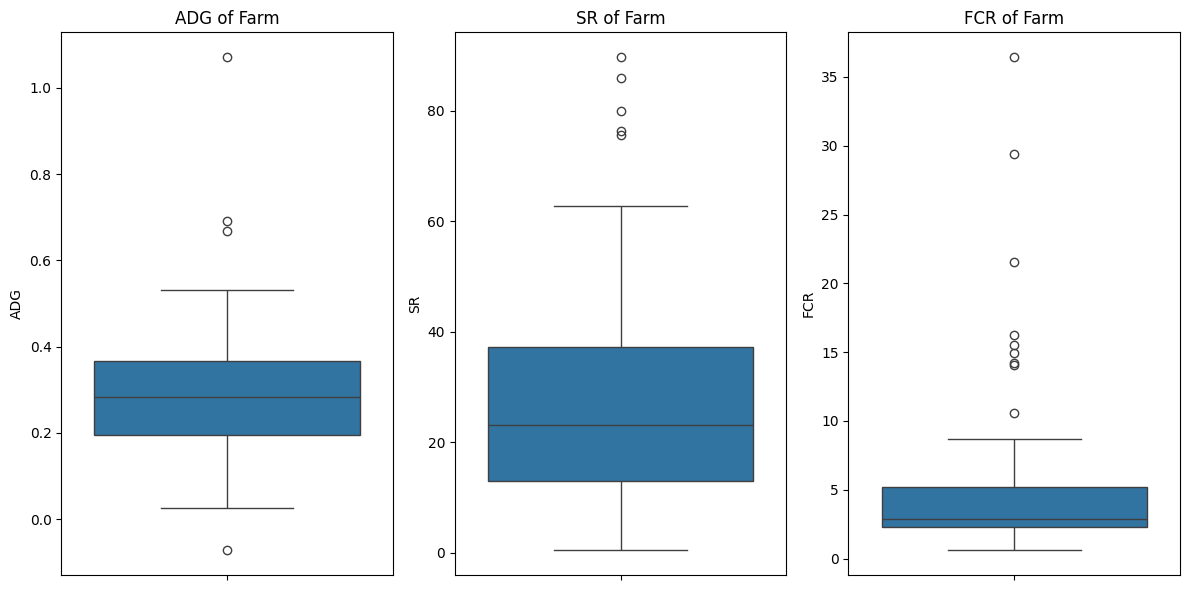

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.boxplot(data=data_farm, y='ADG')
plt.title('ADG of Farm')

plt.subplot(1, 3, 2)
sns.boxplot(data=data_farm, y='SR')
plt.title('SR of Farm')

plt.subplot(1, 3, 3)
sns.boxplot(data=data_farm, y='FCR')
plt.title('FCR of Farm')

plt.tight_layout()
plt.show()

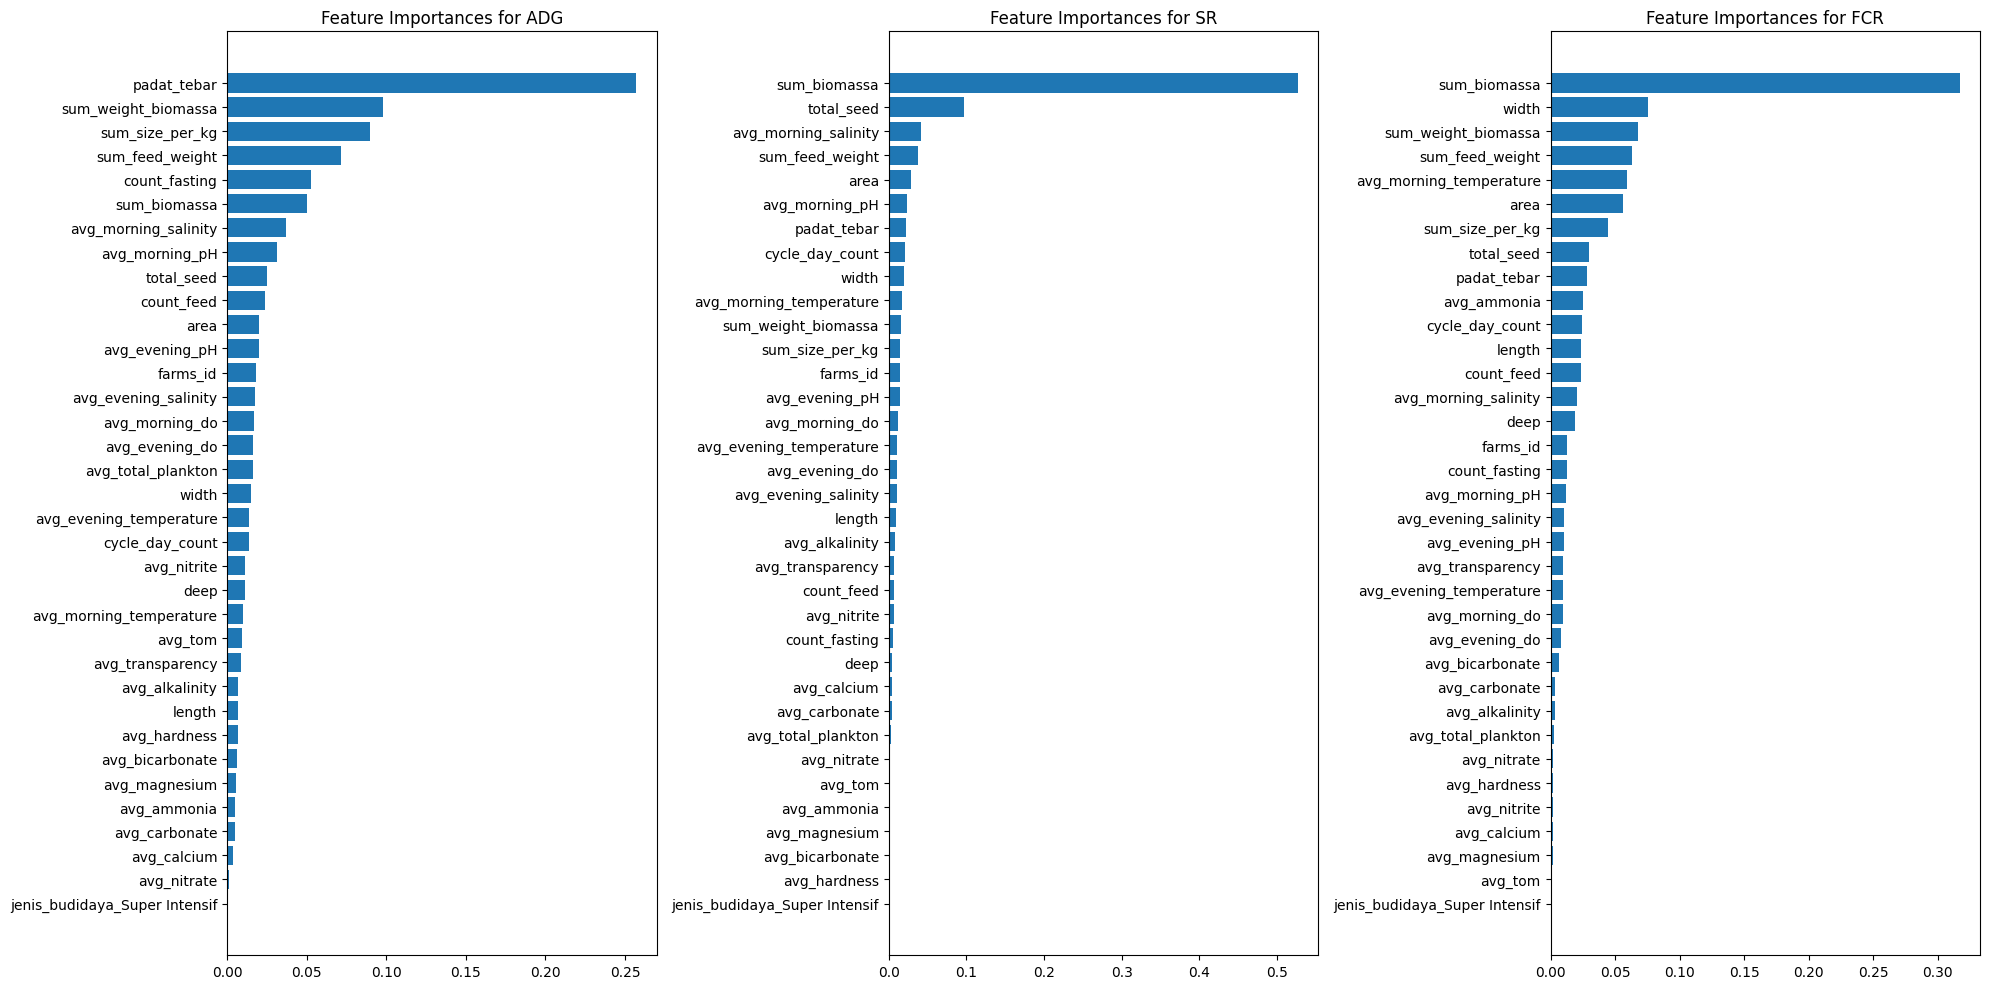

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Memisahkan fitur dan target
X = data_farm.drop(columns=['ponds_id', 'cycles_id', 'province', 'regency',	'timezone', 'started_at', 'finished_at', 'ADG', 'SR', 'FCR'])
X = pd.get_dummies(X, drop_first=True)  # Mengubah variabel kategorikal menjadi numerik

# Model untuk masing-masing target
y_adg = data_farm['ADG']
y_sr = data_farm['SR']
y_fcr = data_farm['FCR']

model_adg = RandomForestRegressor(random_state=42)
model_sr = RandomForestRegressor(random_state=42)
model_fcr = RandomForestRegressor(random_state=42)

X = X.fillna(X.median())

model_adg.fit(X, y_adg)
model_sr.fit(X, y_sr)
model_fcr.fit(X, y_fcr)

# Mendapatkan feature importances
importances_adg = model_adg.feature_importances_
importances_sr = model_sr.feature_importances_
importances_fcr = model_fcr.feature_importances_

# Plot feature importances
features = X.columns
indices_adg = np.argsort(importances_adg)
indices_sr = np.argsort(importances_sr)
indices_fcr = np.argsort(importances_fcr)

plt.figure(figsize=(20, 10))

plt.subplot(1, 3, 1)
plt.title('Feature Importances for ADG')
plt.barh(range(len(indices_adg)), importances_adg[indices_adg], align='center')
plt.yticks(range(len(indices_adg)), [features[i] for i in indices_adg])

plt.subplot(1, 3, 2)
plt.title('Feature Importances for SR')
plt.barh(range(len(indices_sr)), importances_sr[indices_sr], align='center')
plt.yticks(range(len(indices_sr)), [features[i] for i in indices_sr])

plt.subplot(1, 3, 3)
plt.title('Feature Importances for FCR')
plt.barh(range(len(indices_fcr)), importances_fcr[indices_fcr], align='center')
plt.yticks(range(len(indices_fcr)), [features[i] for i in indices_fcr])

plt.tight_layout()
plt.show()

In [ ]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers.index

# Mendeteksi outliers pada masing-masing kolom
outliers_adg = detect_outliers_iqr(data_farm, 'ADG')
outliers_sr = detect_outliers_iqr(data_farm, 'SR')
outliers_fcr = detect_outliers_iqr(data_farm, 'FCR')

# Menggabungkan semua indeks outliers
all_outliers = set(outliers_adg).union(set(outliers_sr)).union(set(outliers_fcr))

# Mengonversi set all_outliers menjadi list
all_outliers_list = list(all_outliers)

# Membuat dataset yang memiliki outliers
df_with_outliers = pd.DataFrame(data_farm.loc[all_outliers_list])

# Membuat dataset yang tidak memiliki outliers
df_without_outliers = pd.DataFrame(data_farm.drop(index=all_outliers_list))

In [ ]:
from scipy.stats import ttest_ind

# List semua kolom numerik
numerical_cols_with_outliers = df_with_outliers.select_dtypes(include=['number']).columns.tolist()
numerical_cols_without_outliers = df_without_outliers.select_dtypes(include=['number']).columns.tolist()

# Mengisi nilai-nilai yang hilang dengan median untuk setiap kolom numerik
df_with_outliers[numerical_cols_with_outliers] = df_with_outliers[numerical_cols_with_outliers].fillna(df_with_outliers[numerical_cols_with_outliers].median())
df_without_outliers[numerical_cols_without_outliers] = df_without_outliers[numerical_cols_without_outliers].fillna(df_without_outliers[numerical_cols_without_outliers].median())

# Lakukan uji t-test untuk setiap kolom numerik di kedua dataset
for col in numerical_cols_with_outliers:
    t_stat, p_val = ttest_ind(df_with_outliers[col], df_without_outliers[col])
    print(f'T-test between {col} with outliers and {col} without outliers:')
    print(f'T-statistic: {t_stat}, P-value: {p_val}')
    if p_val < 0.05:
        print(f'P-value is less than 0.05, there is significant difference between the columns.\n')
    else:
        print(f'P-value is greater than or equal to 0.05, there is no significant difference between the columns.\n')

T-test between farms_id with outliers and farms_id without outliers:
T-statistic: -0.04703688588417651, P-value: 0.9625699023267977
P-value is greater than or equal to 0.05, there is no significant difference between the columns.

T-test between ponds_id with outliers and ponds_id without outliers:
T-statistic: 0.8703218913838989, P-value: 0.38603717923357195
P-value is greater than or equal to 0.05, there is no significant difference between the columns.

T-test between cycles_id with outliers and cycles_id without outliers:
T-statistic: 0.24090086905475477, P-value: 0.810084495753134
P-value is greater than or equal to 0.05, there is no significant difference between the columns.

T-test between length with outliers and length without outliers:
T-statistic: 1.4817040283836156, P-value: 0.14130425915888226
P-value is greater than or equal to 0.05, there is no significant difference between the columns.

T-test between width with outliers and width without outliers:
T-statistic: -0.145

In [ ]:
grouped_data_outliers = df_with_outliers.groupby('jenis_budidaya')
grouped_data_without_outliers = df_without_outliers.groupby('jenis_budidaya')

sederhana_data_outliers = grouped_data_outliers.get_group('Sederhana') if 'Sederhana' in grouped_data_outliers.groups else pd.DataFrame()
semi_intensif_data_outliers = grouped_data_outliers.get_group('Semi Intensif') if 'Semi Intensif' in grouped_data_outliers.groups else pd.DataFrame()
intensif_data_outliers = grouped_data_outliers.get_group('Intensif') if 'Intensif' in grouped_data_outliers.groups else pd.DataFrame()
super_intensif_data_outliers = grouped_data_outliers.get_group('Super Intensif') if 'Super Intensif' in grouped_data_outliers.groups else pd.DataFrame()

sederhana_data_without_outliers = grouped_data_without_outliers.get_group('Sederhana') if 'Sederhana' in grouped_data_without_outliers.groups else pd.DataFrame()
semi_intensif_data_without_outliers = grouped_data_without_outliers.get_group('Semi Intensif') if 'Semi Intensif' in grouped_data_without_outliers.groups else pd.DataFrame()
intensif_data_without_outliers = grouped_data_without_outliers.get_group('Intensif') if 'Intensif' in grouped_data_without_outliers.groups else pd.DataFrame()
super_intensif_data_without_outliers = grouped_data_without_outliers.get_group('Super Intensif') if 'Super Intensif' in grouped_data_without_outliers.groups else pd.DataFrame()

In [ ]:
# Daftar kolom yang ingin dibandingkan
selected_columns = ['padat_tebar', 'avg_transparency', 'avg_nitrate', 'avg_alkalinity', 'avg_tom']

# Fungsi untuk menghitung interval nilai dan nilai yang paling stabil (modus) pada setiap kolom dalam dataframe
def get_non_empty_stats(df, columns):
    stats = {}
    if not df.empty:
        for column in columns:
            min_val = df[column].min()
            max_val = df[column].max()
            mode_val = df[column].mode()[0] if not df[column].mode().empty else None
            stats[column] = {
                'min': min_val,
                'max': max_val,
                'mode': mode_val
            }
    return stats

# Mendapatkan statistik untuk kedua dataset hanya pada kolom yang dipilih
stats_sederhana_data_outliers = get_non_empty_stats(sederhana_data_outliers, selected_columns)
stats_semi_intensif_data_outliers = get_non_empty_stats(semi_intensif_data_outliers, selected_columns)
stats_intensif_data_outliers = get_non_empty_stats(intensif_data_outliers, selected_columns)
stats_super_intensif_data_outliers = get_non_empty_stats(super_intensif_data_outliers, selected_columns)

stats_sederhana_data_without_outliers = get_non_empty_stats(sederhana_data_without_outliers, selected_columns)
stats_semi_intensif_data_without_outliers = get_non_empty_stats(semi_intensif_data_without_outliers, selected_columns)
stats_intensif_data_without_outliers = get_non_empty_stats(intensif_data_without_outliers, selected_columns)
stats_super_intensif_data_without_outliers = get_non_empty_stats(super_intensif_data_without_outliers, selected_columns)

In [ ]:
datasets = {
    'sederhana_data_outliers': sederhana_data_outliers,
    'semi_intensif_data_outliers': semi_intensif_data_outliers,
    'intensif_data_outliers': intensif_data_outliers,
    'super_intensif_data_outliers': super_intensif_data_outliers,
    'sederhana_data_without_outliers': sederhana_data_without_outliers,
    'semi_intensif_data_without_outliers': semi_intensif_data_without_outliers,
    'intensif_data_without_outliers': intensif_data_without_outliers,
    'super_intensif_data_without_outliers': super_intensif_data_without_outliers
}

for name, df in datasets.items():
    if df.empty:
        print(f"Kosong: {name}")
    else:
        print(f"Tidak Kosong: {name}")


Kosong: sederhana_data_outliers
Kosong: semi_intensif_data_outliers
Tidak Kosong: intensif_data_outliers
Tidak Kosong: super_intensif_data_outliers
Kosong: sederhana_data_without_outliers
Kosong: semi_intensif_data_without_outliers
Tidak Kosong: intensif_data_without_outliers
Tidak Kosong: super_intensif_data_without_outliers


In [ ]:
# Membuat dataframe perbandingan interval dan nilai yang paling stabil
comparison = pd.DataFrame({
    'intensif_data_outliers_min': {col: stats_intensif_data_outliers[col]['min'] for col in selected_columns},
    'intensif_data_outliers_max': {col: stats_intensif_data_outliers[col]['max'] for col in selected_columns},
    'intensif_data_without_outliers_min': {col: stats_intensif_data_without_outliers[col]['min'] for col in selected_columns},
    'intensif_data_without_outliers_max': {col: stats_intensif_data_without_outliers[col]['max'] for col in selected_columns},

    'super_intensif_data_outliers_min': {col: stats_super_intensif_data_outliers[col]['min'] for col in selected_columns},
    'super_intensif_data_outliers_max': {col: stats_super_intensif_data_outliers[col]['max'] for col in selected_columns},
    'super_intensif_data_without_outliers_min': {col: stats_super_intensif_data_without_outliers[col]['min'] for col in selected_columns},
    'super_intensif_data_without_outliers_max': {col: stats_super_intensif_data_without_outliers[col]['max'] for col in selected_columns},

    'intensif_data_outliers_mode': {col: stats_intensif_data_outliers[col]['mode'] for col in selected_columns},
    'intensif_data_without_outliers_mode': {col: stats_intensif_data_without_outliers[col]['mode'] for col in selected_columns},

    'super_intensif_data_outliers_mode': {col: stats_super_intensif_data_outliers[col]['mode'] for col in selected_columns},
    'super_intensif_data_without_outliers_mode': {col: stats_super_intensif_data_without_outliers[col]['mode'] for col in selected_columns},
})

comparison = pd.DataFrame(comparison)
comparison = comparison.T
comparison

,padat_tebar,avg_transparency,avg_nitrate,avg_alkalinity,avg_tom
intensif_data_outliers_min,26.400000,33.885374,6.500000,149.519612,70.783333
intensif_data_outliers_max,26.400000,33.885374,6.500000,149.519612,70.783333
intensif_data_without_outliers_min,22.321429,35.053571,0.350000,138.100000,58.048000
intensif_data_without_outliers_max,50.000000,40.658116,0.700000,277.333333,94.213333
super_intensif_data_outliers_min,50.001000,28.333333,0.000000,90.000000,60.000000
super_intensif_data_outliers_max,1851.851852,50.000000,13.000000,357.000000,83.250000
super_intensif_data_without_outliers_min,66.666667,1.200000,0.000000,0.000000,0.000000
super_intensif_data_without_outliers_max,1000.000000,58.227848,40.357143,286.000000,156.000000
intensif_data_outliers_mode,26.400000,33.885374,6.500000,149.519612,70.783333
intensif_data_without_outliers_mode,22.321429,40.658116,0.350000,138.100000,85.320000
